## Graphdefinition and NodeDefinition test

In [1]:
# import sys
# import os
# sys.path.append(os.getcwd())
from graphnet.datasets import TRIDENTSmall
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTNodeDefinition import TRIDENTNodeDefinition

graph_definition = TRIDENTGraphDefinition(node_definition=TRIDENTNodeDefinition())

dataset =  TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = './datasets',
                    train_dataloader_kwargs = {
                        'batch_size': 3,
                        'num_workers': 1,
                        },
                    backend = 'sqlite')

graphnet [MainProcess] WARNING  2024-10-28 21:33:28 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [MainProcess] WARNING  2024-10-28 21:33:29 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [MainProcess] INFO     2024-10-28 21:33:29 - TRIDENT.__init__ - Writing log to logs/graphnet_20241028-213329.log
graphnet [MainProcess] WARNING  2024-10-28 21:33:29 - TRIDENTGraphDefinition.__call__ - No EdgeDefinition given. Graphs will not have edges!
graphnet [MainProcess] INFO     2024-10-28 21:33:30 - __init__ - No `val_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.
graphnet [MainProcess] INFO     2024-10-28 21:33:30 - __init__ - No `test_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.


In [2]:
graph_definition._node_definition

TRIDENTNodeDefinition(
  TRIDENTNodeDefinition(
  {
      'arguments': {
          'output_feature_names': ['nx', 'ny', 'nz', 't1st', 'nhits', 'norm_xyz'],
          'keys': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z', 't'],
          'id_columns': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z'],
          'time_column': 't',
      },
  })
)

In [3]:
train_dataloader = dataset.train_dataloader
val_dataloader = dataset.val_dataloader
test_dataloader = dataset.test_dataloader

In [4]:
batch = next(iter(train_dataloader))
print(batch)
data = batch[0]
# print(batch.sensor_pos_x)
print(batch.x)
print(batch.x.max(dim=0)[0])
print(batch.x.min(dim=0)[0])

graphnet [Process-1] WARNING  2024-10-28 21:33:32 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [Process-1] WARNING  2024-10-28 21:33:33 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [Process-1] INFO     2024-10-28 21:33:33 - TRIDENT.__init__ - Writing log to logs/graphnet_20241028-213333.log
Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
DataBatch(x=[11, 6], n_pulses=[2], dataset_path=[2], event_no=[2], muon=[2], muon_stopped=[2], noise=[2], neutrino=[2], v_e=[2], v_u=[2], v_t=[2], track=[2], dbang=[2], corsika=[2], interaction=[2], initial_state_energy=[2], initial_st

In [5]:
batch[1]["n_pulses"]

tensor([46], dtype=torch.int32)

In [6]:
batch[1].x[:,0:3]

tensor([[-0.8707,  0.2480,  0.4246],
        [-0.8034,  0.2675,  0.5319],
        [-0.3873,  0.6805, -0.6220],
        [-0.0901, -0.9599, -0.2654],
        [-0.0720, -0.7677,  0.6367],
        [ 0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000],
        [ 0.8733, -0.3821, -0.3021]])

In [7]:
batch[1].x[:,4]
sum(batch[1].x[:,4])

tensor(46.)

Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
Start. x shape: torch.Size([4, 4])
End. x shape: (4, 6)
Num hits: 4.0
Start. x shape: torch.Size([14, 4])
End. x shape: (4, 6)
Num hits: 14.0
Start. x shape: torch.Size([23, 4])
End. x shape: (6, 6)
Num hits: 23.0
tensor(46.)
46


/var/folders/4j/0dbg6pc97f793yghk9n2n0340000gn/T/ipykernel_49228/2807249913.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


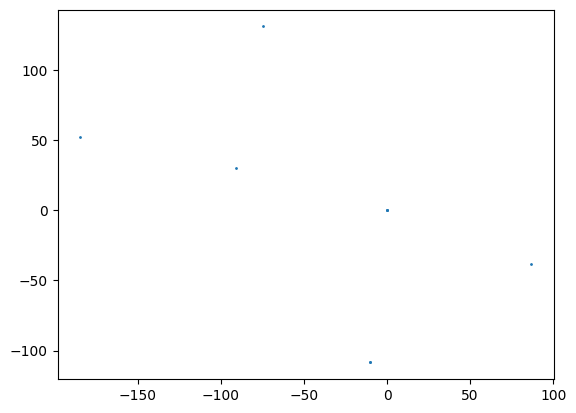

In [8]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots()
for i, batch in enumerate(train_dataloader):
    ax.scatter((batch[1].x[:,0] * batch[1].x[:,5]).numpy(), (batch[1].x[:,1] * batch[1].x[:,5]).numpy(), s=1)
    print(sum(batch[1].x[:,4]))
    print(sum(batch[1]["n_pulses"].numpy()))
    if i==0:
        break
fig.show()

## Implementation test

In [230]:
from typing import Dict, Any

config: Dict[str, Any] = {
        "path": "./datasets",
        "batch_size": 3,
        "num_workers": 1,
        # "target": "direction",
        "early_stopping_patience":5,
        "fit": {
            "gpus": [0],
            "max_epochs": 200,
        },
    }

In [231]:
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTGraphDefinition import TRIDENT

features = ['sensor_pos_x','sensor_pos_y','sensor_pos_z', "t"]
graph_definition= TRIDENTGraphDefinition(detector = TRIDENT(),
                                input_feature_names=features)

In [232]:
from graphnet.datasets import TRIDENTSmall

data_module = TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = config["path"],
                    train_dataloader_kwargs = {
                        'batch_size': config["batch_size"],
                        'num_workers': config["num_workers"],
                        },
                    backend = 'sqlite')

training_dataloader = data_module.train_dataloader
validation_dataloader = data_module.val_dataloader

In [222]:
from TridentNet import TridentTrackNet, default_net_setting

backbone = TridentTrackNet(settings=default_net_setting,DEVICE="cpu")

In [233]:
batch = next(iter(training_dataloader))
# pred=backbone(batch)

graphnet [Process-37] WARNING  2024-11-04 15:03:20 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [Process-37] WARNING  2024-11-04 15:03:21 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [Process-37] INFO     2024-11-04 15:03:21 - TRIDENT.__init__ - Writing log to logs/graphnet_20241104-150321.log
Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
Start. x shape: torch.Size([4, 4])
End. x shape: (4, 6)
Num hits: 4.0
Start. x shape: torch.Size([14, 4])
End. x shape: (4, 6)
Num hits: 14.0
Start. x shape: torch.Size([23, 4])
End. x shape: (6, 6)
Num hits: 23.0


In [218]:
batch[0].keys()

['initial_state_z',
 'interaction',
 'muon_stopped',
 'corsika',
 'initial_state_type',
 'inject_pos',
 'dataset_path',
 'ny',
 'initial_state_y',
 'nhits',
 'direction',
 'initial_state_azimuth',
 'pos',
 'dbang',
 't1st',
 'v_u',
 'noise',
 'nz',
 'initial_state_x',
 'graph_definition',
 'event_no',
 'v_e',
 'track',
 'n_pulses',
 'nx',
 'initial_state_energy',
 'v_t',
 'initial_state_zenith',
 'norm_xyz',
 'x',
 'muon',
 'vertex',
 'features',
 'neutrino']

In [235]:
len(batch.inject_pos)

48

In [247]:
batch

DataBatch(x=[11, 6], n_pulses=[2], dataset_path=[2], event_no=[2], muon=[2], muon_stopped=[2], noise=[2], neutrino=[2], v_e=[2], v_u=[2], v_t=[2], track=[2], dbang=[2], corsika=[2], interaction=[2], initial_state_energy=[2], initial_state_type=[2], initial_state_zenith=[2], initial_state_azimuth=[2], initial_state_x=[2], initial_state_y=[2], initial_state_z=[2], direction=[6], pos=[48, 3], vertex=[6], inject_pos=[48, 3], features=[2], nx=[11], ny=[11], nz=[11], t1st=[11], nhits=[11], norm_xyz=[11], graph_definition=[2], batch=[11], ptr=[3])

In [115]:
pred = backbone(batch)

In [118]:
type(pred), pred.size()

(torch.Tensor, torch.Size([4, 3]))

In [25]:
import numpy as np
np.cos(batch[0].initial_state_zenith),batch[0].direction

(tensor([0.9168], dtype=torch.float64),
 tensor([[-0.1223,  0.3801,  0.9168]], dtype=torch.float64))

In [113]:
batch.x[:,4]
from torch_geometric import nn as tgnn
sum_weights = tgnn.global_add_pool(batch.x[:,4], batch.batch)

In [8]:
from MiddleReconModel import MiddleReconModel
model = MiddleReconModel(
        backbone=backbone,
        optimizer_kwargs={"lr": 1e-03},
        scheduler_kwargs={
            "patience": 2,
        },
        scheduler_config={
            "frequency": 1,
            "monitor": "val_loss",
        },
    )

In [98]:
import torch

t = torch.tensor([[  264.3960,   594.9710, -3075.0000,   348.5565],
        [  349.7750,   638.9930, -3075.0000,   280.1174],
        [  349.7750,   638.9930, -3045.0000,   278.1992],
        [  349.7750,   638.9930, -3015.0000,   0]])

In [93]:
t[torch.min(t[:,3],dim=0)[1]]

tensor([  349.7750,   638.9930, -3015.0000,     0.0000])

In [181]:
batch.initial_state_x

tensor([-188.7141, -486.3596], dtype=torch.float64)

In [183]:
vertex=torch.stack([batch[0].initial_state_x,batch[0].initial_state_y,batch[0].initial_state_z],dim=1)

In [250]:
batch.x

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
          0.0000e+00],
        [ 7.5632e-01, -6.5420e-01,  0.0000e+00,  8.6612e-01,  1.0000e+00,
          9.4225e+01],
        [-8.7075e-01,  2.4799e-01,  4.2462e-01,  2.7056e+02,  1.0000e+00,
          2.1196e+02],
        [-8.0344e-01,  2.6745e-01,  5.3194e-01,  2.5211e+01,  1.0000e+00,
          1.1279e+02],
        [-3.8726e-01,  6.8051e-01, -6.2204e-01,  2.2090e+02,  1.0000e+00,
          1.9291e+02],
        [-9.0066e-02, -9.5993e-01, -2.6537e-01,  1.3358e+02,  1.0000e+00,
          1.1305e+02],
        [-7.2033e-02, -7.6773e-01,  6.3671e-01,  1.6737e+02,  1.0000e+00,
          1.4135e+02],
        [ 0.0000e+00,  0.0000e+00, -1.0000e+00,  2.4838e+01,  7.0000e+00,
          3.0000e+01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  9.7577e-01,  1.1000e+01,
          0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00,  4.6640e+00,  2.2000e+01,
          3.0000e+01],
        [ 8.7335e-01, -3.8210e

In [249]:
batch.nx

tensor([ 0.0000,  0.7563, -0.8707, -0.8034, -0.3873, -0.0901, -0.0720,  0.0000,
         0.0000,  0.0000,  0.8733])

In [253]:
torch.stack([batch.nx*batch.norm_xyz,batch.ny,batch.nz],dim=1)

tensor([[   0.0000,    0.0000,    0.0000],
        [  71.2640,   -0.6542,    0.0000],
        [-184.5600,    0.2480,    0.4246],
        [ -90.6230,    0.2675,    0.5319],
        [ -74.7070,    0.6805,   -0.6220],
        [ -10.1820,   -0.9599,   -0.2654],
        [ -10.1820,   -0.7677,    0.6367],
        [   0.0000,    0.0000,   -1.0000],
        [   0.0000,    0.0000,    0.0000],
        [   0.0000,    0.0000,    1.0000],
        [  86.7280,   -0.3821,   -0.3021]])

In [185]:
vertex.flatten()

tensor([ -188.7141,  1183.8876, -2864.4598], dtype=torch.float64)